# Regresión Lineal simple

El objetivo de una regresión lineal simple (univariada) es modelar una relación entre una característica simple (variable explicativa x) y una respuesta de valor continuo (variable de destino y)

La ecuación de la recta (modelo lineal simple) es como sigue: 

$$ y = w_o + w_1x $$

Donde el peso $w_0$ representa el corte con el eje "y" y $w_1$ es el coeficiente ponderado de la variable explicativa (pendiente de la recta).

**El objetivo es calcular los pesos de la ecuación lineal anterior en base a ciertos datos para describir la relación entre la variable explicativa y la variable de destino.**


En otras palabras la regresión lineal se puede definir como la búsqueda de la recta que mejor se ajuste a través de puntos de muestra.

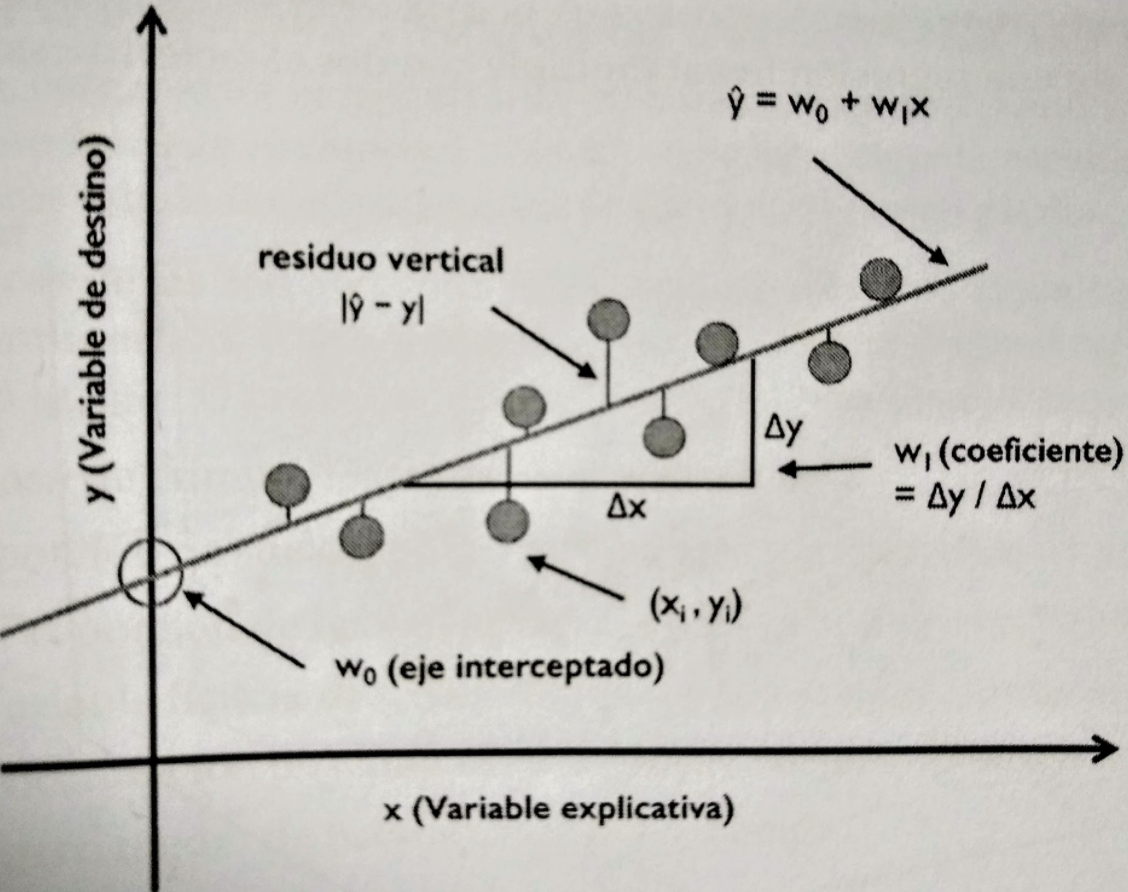

La línea que se ajusta a los puntos se conoce como **recta de regresión** y las líneas verticales que van de la recta de regresión a los puntos de muestra se conocen como **offsets o residuos**

# ¿Cómo se ajusta la recta?

- Existen variados métodos para ajustar la recta a los puntos, para el ejercicio actual vamos a utilizar el modelo de sklearn: LinearRegression(), el cual busca minimizar la suma de los errores al cuadrado. MÉTODO DE MÍNIMOS CUADRADOS


#### Lo que busca este método es minimizar el error a través de los parametros $w_0$ y $w_1$ .

Para encontrar el valor de $w_1$ utilizamos la siguiente ecuación:

$$
w_1  = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2} 
$$

Para encontrar el valor de $w_0$ se utiliza la siguiente ecuación:
    
$$\bar{y} - w_1 \bar{x}$$

## Evaluar el resultado 


#### Existen diferentes métodos para evaluar el error entre la predicción y el valor real. 

**1. Mean Absolute Error.** Es el valor absoluto de los errores, es la métrica más fácil de entender y la podemos interpretar como el promedio del error. 

$$ MAE = \frac{1}{n}\sum_{i=1}^{n} \left | y_i - \widehat{y_i} \right | $$

**2. Mean Squared Error.** Es el promedio del error cuadrado y se utiliza cuando se tienen grandes errores. Esto se debe a que el término al cuadrado aumenta exponencialmente los errores más grandes en comparación con los más pequeños.

$$ MSE = \frac{1}{n}\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2 $$

**3. Root Mean Squared Error.** Es el más popular de las métricas de evaluacion para regresiones porque se puede interpretar en las mismas unidades que $y$ lo que facilita entender la información que proporciona. 

$$ RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2} $$


**4. Relative Absolute Error (también conocido como: Residual Sum of Square).** Toma el total del error absoluto y lo normaliza al dividirlo por el total del error absoluto de cada uno de los puntos de evaluación. 

$$ RAE = \frac{\sum_{i=1}^{n} \left | y_i - \widehat{y_i} \right |}{\sum_{i=1}^{n} \left | y_i - \overline{y_i} \right |}$$

**5. Relative Squared Error.** Es muy similiar al RAE pero su utilización se acerca más a la comunidad de data science debido a que se utiliza para calcular $R^2$ 

$$ RSE = \frac{\sum_{i=1}^{n}  (y_i - \widehat{y_i})^2 }{\sum_{i=1}^{n}  (y_i - \overline{y_i})^2 } $$ 

**6. R squared.** No es un error por si mismo, pero es la métrica más popular en el mundo de data science para evaluar el rendimiento de un modelo de regresión. Representa que tan cerca están las predicciones de los valores reales en una escala de -inf a 1. 

Cuanto más alto el valor de $R^2$ , más aproximado es el resultado del modelo a los datos que se han utilizado. El valor máximo que puede alcanzar es 1.

$$ R^2 = 1- RSE $$ 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("FuelConsumptionCo2.csv") #Características de autos y emisión de CO2
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape

(1067, 13)

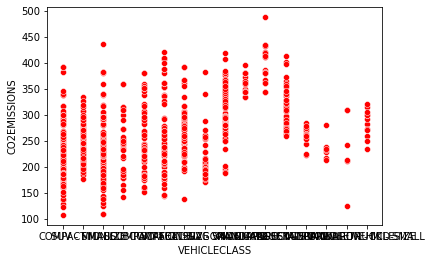

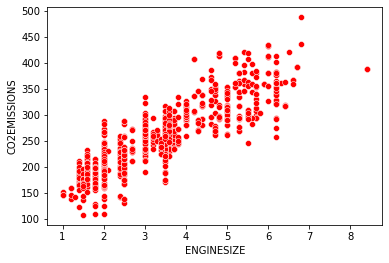

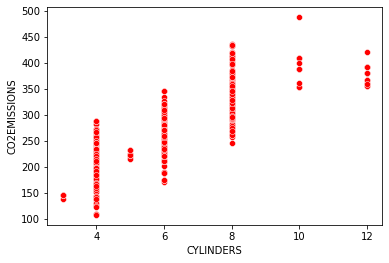

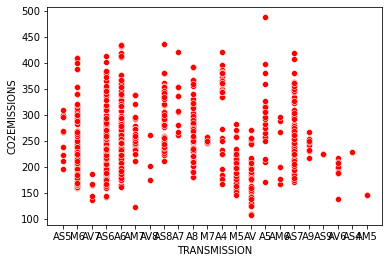

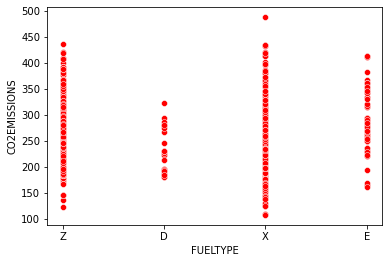

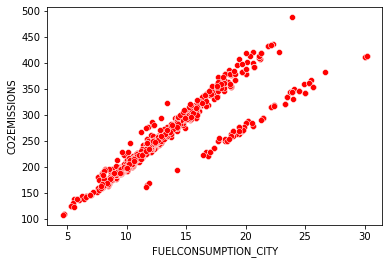

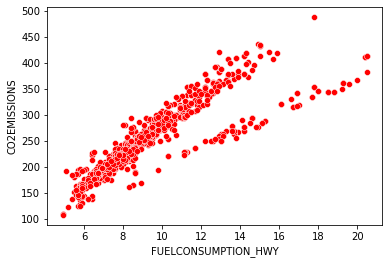

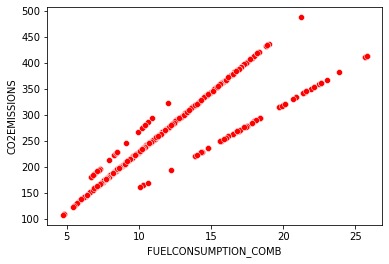

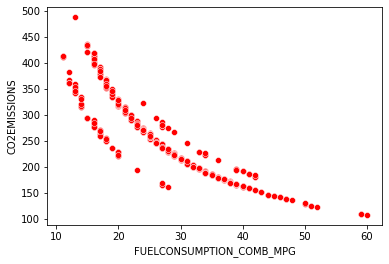

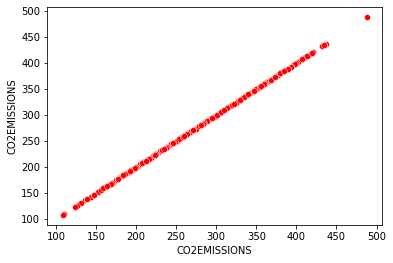

In [56]:
# Se muestran un par de atributos vs la emisión de CO2

for i in df.columns[3:]:
    sns.scatterplot(x = df[i] ,y =df.CO2EMISSIONS, color="r")
    plt.show()

In [5]:
# Se selecciona el tamaño del motor vs la emisión de CO2

df[["ENGINESIZE", "CO2EMISSIONS"]]

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136
3,3.5,255
4,3.5,244
...,...,...
1062,3.0,271
1063,3.2,264
1064,3.0,271
1065,3.2,260


In [6]:
# X es la variable explicativa 
# y es la variable destino

X = df[["ENGINESIZE"]].values
y = df[["CO2EMISSIONS"]].values

In [7]:
#Se observan las dimensiones 

X.shape, y.shape

((1067, 1), (1067, 1))

In [8]:
X

array([[2. ],
       [2.4],
       [1.5],
       ...,
       [3. ],
       [3.2],
       [3.2]])

In [12]:
#Se escalan los datos, recomendable cuando hay mucha disparidad entre las escalas de los datos.

from sklearn.preprocessing import MinMaxScaler

scaler_x = MinMaxScaler()
scaler_x.fit(X)
X = scaler_x.transform(X)

scaler_y = MinMaxScaler()
scaler_y.fit(y)
y = scaler_y.transform(y)

In [13]:
# Se utiliza la función train_test_split de sklearn
# Para dividir los datos en el conjunto de entrenamiento (train)
# y en el conjunto de prueba (test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=5)

In [14]:
#Se muestran las dimensiones de ambos conjuntos

X_train.shape, X_test.shape

((746, 1), (321, 1))

In [15]:
# Algoritmo de regresión lineal de scikitlearn

regresion_lineal = linear_model.LinearRegression()
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ('w_1: ', regresion_lineal.coef_)
print ('w_0: ',regresion_lineal.intercept_)

w_1:  [[0.74983912]]
w_0:  [0.15154337]


In [65]:
regresion_lineal.intercept_

array([0.15154337])

In [17]:
b = regresion_lineal.intercept_
m = regresion_lineal.coef_

In [18]:
# Ecuacion de una recta y = m*x + b
y = m*X_train + b

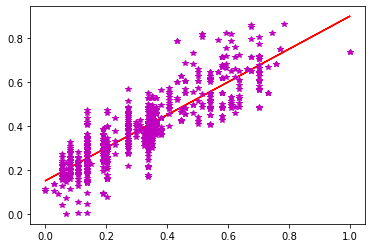

In [21]:
# Se muestran los patrones del conjunto de entrenamiento (train)
# y la recta de regresión que se genera
plt.plot(X_train,y,"r")
plt.plot(X_train,y_train,"*m")
plt.show()

### .predict() 

Como parametro de entrada el conjunto X_test y queremos que prediga que valores ($\widehat{y}$) debería de tener cada elemento

In [69]:
X_test[3]

array([0.40540541])

In [23]:
#yhat son las predicciones del valor que deberia de tener
# cada uno de los patrones de X_test

yhat = regresion_lineal.predict(X_test)
print(yhat[:5])

[[0.41500036]
 [0.41500036]
 [0.15154337]
 [0.45553221]
 [0.65819143]]


In [24]:
#Se crea un for para visualizar el valor real y el predicho para 
# los patrones del conjunto de prueba

for i,j in zip(yhat,y_test):
    print("Predicción: ",i, "Valor real: ",j)
    

Predicción:  [0.41500036] Valor real:  [0.39736842]
Predicción:  [0.41500036] Valor real:  [0.47894737]
Predicción:  [0.15154337] Valor real:  [0.10263158]
Predicción:  [0.45553221] Valor real:  [0.45526316]
Predicción:  [0.65819143] Valor real:  [0.71578947]
Predicción:  [0.4048674] Valor real:  [0.35789474]
Predicción:  [0.49606405] Valor real:  [0.55789474]
Predicción:  [0.29340483] Valor real:  [0.28421053]
Predicción:  [0.19207522] Valor real:  [0.19473684]
Predicción:  [0.29340483] Valor real:  [0.21315789]
Predicción:  [0.4048674] Valor real:  [0.38157895]
Predicción:  [0.57712774] Valor real:  [0.66578947]
Predicción:  [0.7189892] Valor real:  [0.66052632]
Predicción:  [0.25287299] Valor real:  [0.27368421]
Predicción:  [0.60752663] Valor real:  [0.67105263]
Predicción:  [0.30353779] Valor real:  [0.28947368]
Predicción:  [0.25287299] Valor real:  [0.22105263]
Predicción:  [0.67845735] Valor real:  [0.58157895]
Predicción:  [0.25287299] Valor real:  [0.27894737]
Predicción:  [0

### .score() y  r2_score()

In [72]:
#Dos formas de calcular el r2, utilizando .score() o r2_score()

regresion_lineal.score(X_test,y_test) #r2_score  

0.7800849404512346

In [73]:
from sklearn.metrics import r2_score #r2_score 
r2_score(y_test,yhat)

0.7800849404512346

# $R^2$ Ajustada 

Se utiliza para evitar que al agregar más variables explicativas al modelo (por ejemplo la regresión multilineal), el valor de $R^2$ no aumente por el hecho de existir más variables. 


Por lo que para regresiones lineales se recomienda utilizar cualquiera de las dos $R^2$ y para regresiones multilineales utilizar la $R^2$ ajustada.

# Ecuación $R^2$ ajustada

$$
R^2 ajustada = 1 - \frac{(1-R^2)(N-1)}{N-p-1}
$$

Donde:
- $R^2$ = $R^2$ sin ajustar 
- p = Número de predictores (# variables explicativas )
- N = Total de patrones (# tamaño total de la muestra )


In [25]:
r2_sin_ajustar = regresion_lineal.score(X_test, y_test) 
r2_ajustada = 1 - (1-regresion_lineal.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
r2_sin_ajustar, r2_ajustada

(0.7800849404512344, 0.7793955515498276)

## PREDECIR un DATO

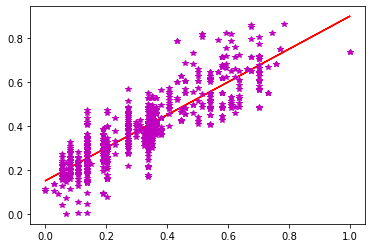

In [27]:
# Se muestran los patrones del conjunto de entrenamiento (train)
# y la recta de regresión que se genera
plt.plot(X_train,y,"r")
plt.plot(X_train,y_train,"*m")
plt.show()

In [28]:
X_test[:1]

array([[0.35135135]])

In [29]:
regresion_lineal.predict(np.array([[0.8]]))

array([[0.75141467]])

In [30]:
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [31]:
scaler_y.inverse_transform(np.array([[0.75141467]]))

array([[0.75141467]])

## Ejemplo 2

si tiene un tamaño de motor de 3.2 nos deberia de devolver 264

In [91]:
scaler_x.transform(np.array([[3.2]]))

array([[0.2972973]])

In [94]:
regresion_lineal.predict(np.array([[3.2]]))

array([[2.77598031]])

In [93]:
scaler_y.inverse_transform(np.array([[0.3743]]))

array([[250.234]])